In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(rvest)
library(stringr)
library(janitor)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [63]:
#set seed
set.seed(1)

#Read file from github and turn into csv
url = "https://raw.githubusercontent.com/schan26/dsci-100-grp18/main/chronic_kidney_disease_full.arff"
download.file(url, "ckd_data.csv")
ckd_data <- read_delim("ckd_data.csv", delim = ",", col_names = FALSE, skip = 145)

#add column names
colnames(ckd_data) <- c("age", "blood_pressure", "specific_gravity", 
                                    "albumin", "sugar", "red_blood_cells", "pus_cell", 
                                    "pus_cell_clumps", "bacteria", "blood_glucose_random", 
                                    "blood_urea", "serum_creatinine", "sodium", "pot", 
                                    "hemoglobin", "packed_cell_volume", "white_blood_cell_count", 
                                    "red_blood_cell_count", "hypertension", "diabetes_mellitus", 
                                    "coronary_artery_disease", "appetite", "pedal_edema", 
                                    "anemia", "ckd")
#wrangling data
ckd_data[ckd_data == "?"] <- NA
ckd_data[ckd_data == "ckd" | ckd_data == "ckd," | ckd_data == "ckd\t"] <- "yes" #rename data to make it more readable
ckd_data[ckd_data == "no,notckd" | ckd_data == "notckd"] <- "no"

#Change to correct type
ckd_data[,c(1:5,10:18)] <- sapply(ckd_data[, c(1:5,10:18)], as.numeric )
ckd_data[,c(6:9,19:25)] <- lapply(ckd_data[, c(6:9,19:25)], as.factor )

ckd_data

#splitting data into training and testing datasets
ckd_data_split <- initial_split(ckd_data, prop = 0.75, strata = ckd)

ckd_training <- training(ckd_data_split)
ckd_testing <- testing(ckd_data_split)

glimpse(ckd_training)
glimpse(ckd_testing)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 400 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”


age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,⋯,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,ckd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
48,80,1.02,1,0,NA,normal,notpresent,notpresent,121,⋯,44,7800,5.2,yes,yes,no,good,no,no,yes
7,50,1.02,4,0,NA,normal,notpresent,notpresent,NA,⋯,38,6000,NA,no,no,no,good,no,no,yes
62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,⋯,31,7500,NA,no,yes,no,poor,no,yes,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,⋯,49,6600,5.4,no,no,no,good,no,no,no
17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,⋯,51,7200,5.9,no,no,no,good,no,no,no
58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,⋯,53,6800,6.1,no,no,no,good,no,no,no


Rows: 299
Columns: 25
$ age                     <dbl> 40, 23, 45, 34, 60, 35, 49, 55, 45, 42, 55, 48…
$ blood_pressure          <dbl> 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80…
$ specific_gravity        <dbl> 1.025, 1.025, 1.025, 1.025, 1.025, 1.020, 1.02…
$ albumin                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, NA, 0, 0, …
$ sugar                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, NA, 0, 0, …
$ red_blood_cells         <fct> normal, normal, normal, normal, normal, normal…
$ pus_cell                <fct> normal, normal, normal, normal, normal, normal…
$ pus_cell_clumps         <fct> notpresent, notpresent, notpresent, notpresent…
$ bacteria                <fct> notpresent, notpresent, notpresent, notpresent…
$ blood_glucose_random    <dbl> 140, 70, 82, 121, 131, 104, 122, 118, 117, 132…
$ blood_urea              <dbl> 10, 36, 49, 27, 10, 31, 32, 18, 46, 24, 17, 33…
$ serum_creatinine        <dbl> 1.2, 1.0, 0.6, 1.2, 0.5, 1.2, 1.2, 0.9, 1.2, 0…
$ sodium          

In [118]:
#exploratory data analysis: summarizing the min, max, mean of each predictor + total num of rows & total num of rows with missing values in each class
ckd_analysis <- ckd_training |>
    group_by(ckd) |>
    summarize(count = n(), n_row_missing_value = sum(!complete.cases(ckd_training[, 1, 14, 17]) == 1),
              min_age = min(age, na.rm = TRUE), max_age = max(age, na.rm = TRUE), mean_age = mean(age, na.rm = TRUE),
              min_sc = min(serum_creatinine, na.rm = TRUE), max_sc = max(serum_creatinine, na.rm = TRUE), mean_sc = mean(serum_creatinine, na.rm = TRUE),
              min_bu = min(blood_urea, na.rm = TRUE), max_bu = max(blood_urea, na.rm = TRUE), mean_bu = mean(blood_urea, na.rm = TRUE))

ckd_analysis

ckd,count,n_row_missing_value,min_age,max_age,mean_age,min_sc,max_sc,mean_sc,min_bu,max_bu,mean_bu
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,112,7,12,80,47.09009,0.4,1.2,0.8854545,10.0,50,33.28440
yes,187,7,5,83,54.87293,0.5,48.1,4.0872881,1.5,391,70.10909


In [117]:
#exploratory data analysis: summarizing the min, max, mean of each predictor + total num of rows & total num of rows with missing values in each class
ckd_analysis <- ckd_training |>
    group_by(ckd) |>
    summarize(count = n(), n_row_missing_value = sum(!complete.cases(ckd_training[, 1, 14, 17]) == 1),
              min_age = min(age, na.rm = TRUE), max_age = max(age, na.rm = TRUE), mean_age = mean(age, na.rm = TRUE), n_pot_over_10 = sum(ckd_training$pot > 10, na.rm = TRUE),
              min_potassium = min(pot, na.rm = TRUE), max_potassium = max(pot, na.rm = TRUE), mean_potassium = mean(pot, na.rm = TRUE),
              min_wbc_count = min(white_blood_cell_count, na.rm = TRUE), max_wbc_count = max(white_blood_cell_count, na.rm = TRUE), mean_wbc_count = mean(white_blood_cell_count, na.rm = TRUE))

ckd_analysis

ckd,count,n_row_missing_value,min_age,max_age,mean_age,n_pot_over_10,min_potassium,max_potassium,mean_potassium,min_wbc_count,max_wbc_count,mean_wbc_count
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,112,7,12,80,47.09009,2,3.3,5,4.406422,4300,11000,7828.571
yes,187,7,5,83,54.87293,2,2.5,47,5.034711,2200,26400,9033.043


age,pot,white_blood_cell_count,ckd,serum_creatinine,blood_urea,blood_glucose_random
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
40,5.0,10400,no,1.2,10,140
23,4.6,9800,no,1.0,36,70
45,4.4,9100,no,0.6,49,82
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,5.7,5000,yes,15.2,215,106
59,4.5,10200,yes,1.7,55,424
56,6.5,5400,yes,13.3,309,176


Warning message:
“Removed 115 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 76 rows containing missing values (`geom_point()`).”


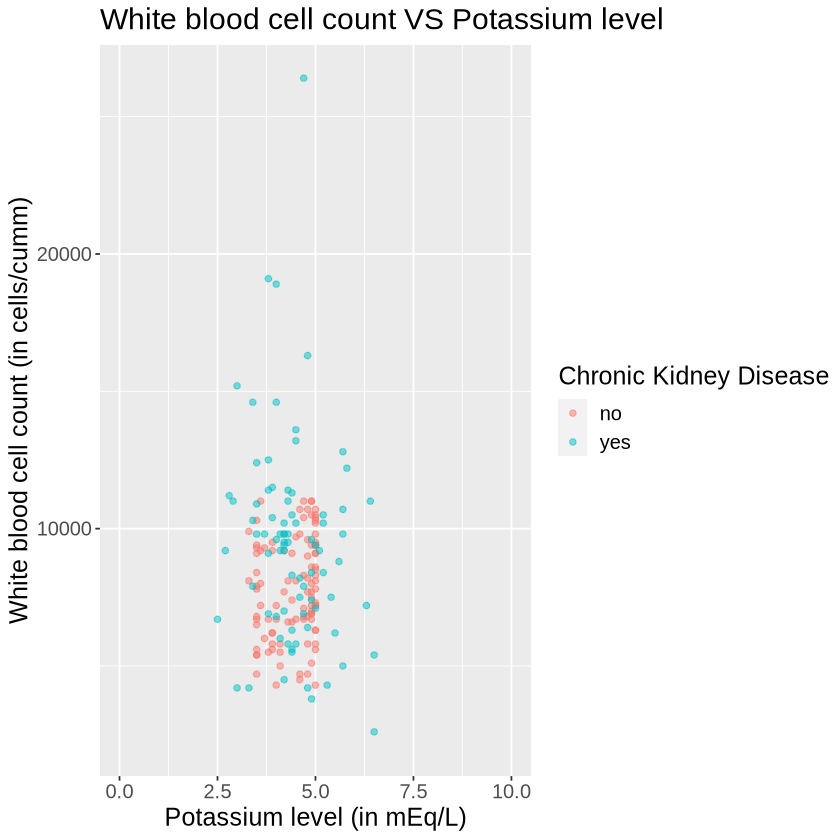

Warning message:
“Removed 83 rows containing missing values (`geom_point()`).”


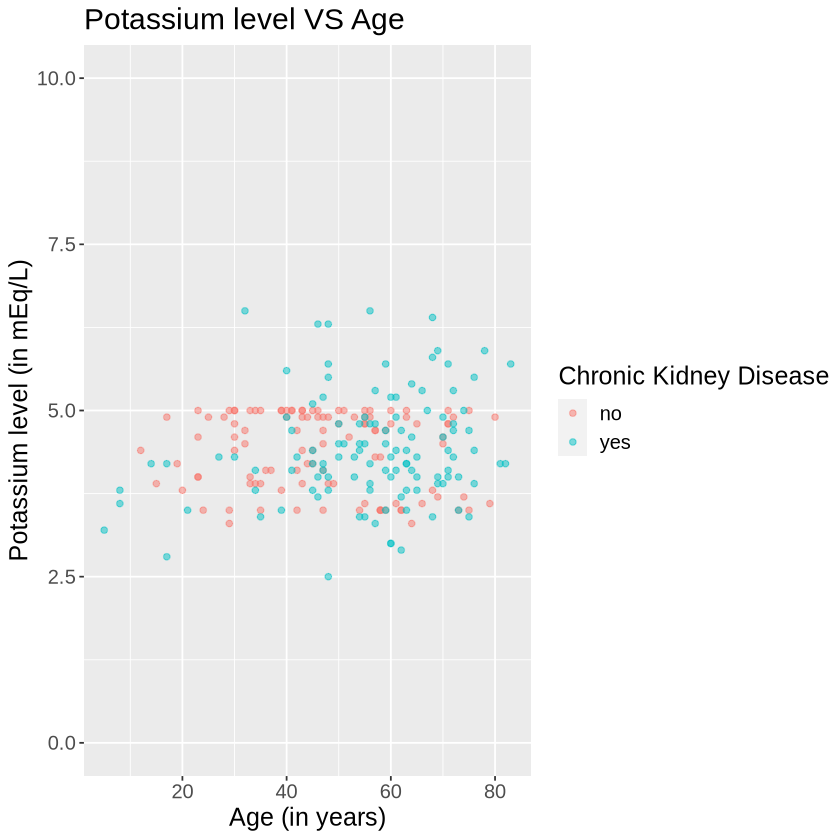

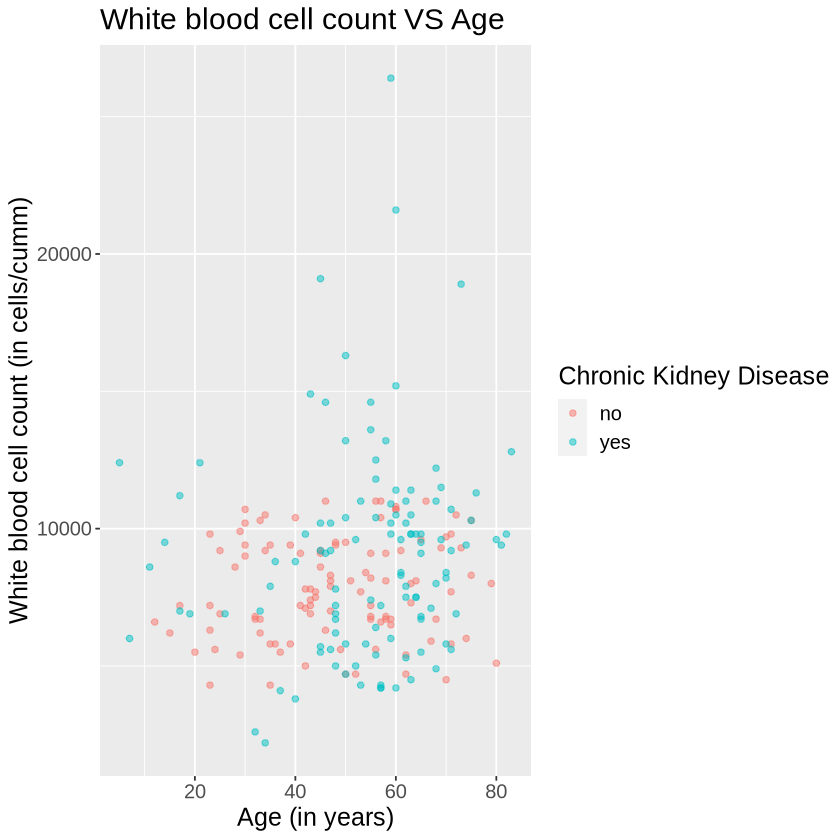

In [120]:
#plotting training data 
ckd_plot <- select(ckd_training, age, pot, white_blood_cell_count, ckd, serum_creatinine, blood_urea, blood_glucose_random)
ckd_plot 

plot1 <- ggplot(ckd_plot, aes(x = pot, y = white_blood_cell_count, color = ckd)) +
    geom_point(alpha = 0.5) +
    labs(x = "Potassium level (in mEq/L)", y = "White blood cell count (in cells/cumm)", color = "Chronic Kidney Disease") +
    ggtitle("White blood cell count VS Potassium level") +
    scale_x_continuous(limits=c(0,10)) +
    theme(text=element_text(size=15))

plot2 <- ggplot(ckd_plot, aes(x = age, y = pot, color = ckd)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (in years)", y = "Potassium level (in mEq/L)", color = "Chronic Kidney Disease") +
    ggtitle("Potassium level VS Age") +
    scale_y_continuous(limits=c(0,10)) +
    theme(text=element_text(size=15))

plot3 <- ggplot(ckd_plot, aes(x = age, y = white_blood_cell_count, color = ckd)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (in years)", y = "White blood cell count (in cells/cumm)", color = "Chronic Kidney Disease") +
    ggtitle("White blood cell count VS Age") +
    theme(text=element_text(size=15))

plot1
plot2
plot3

Warning message:
“Removed 19 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 21 rows containing missing values (`geom_point()`).”


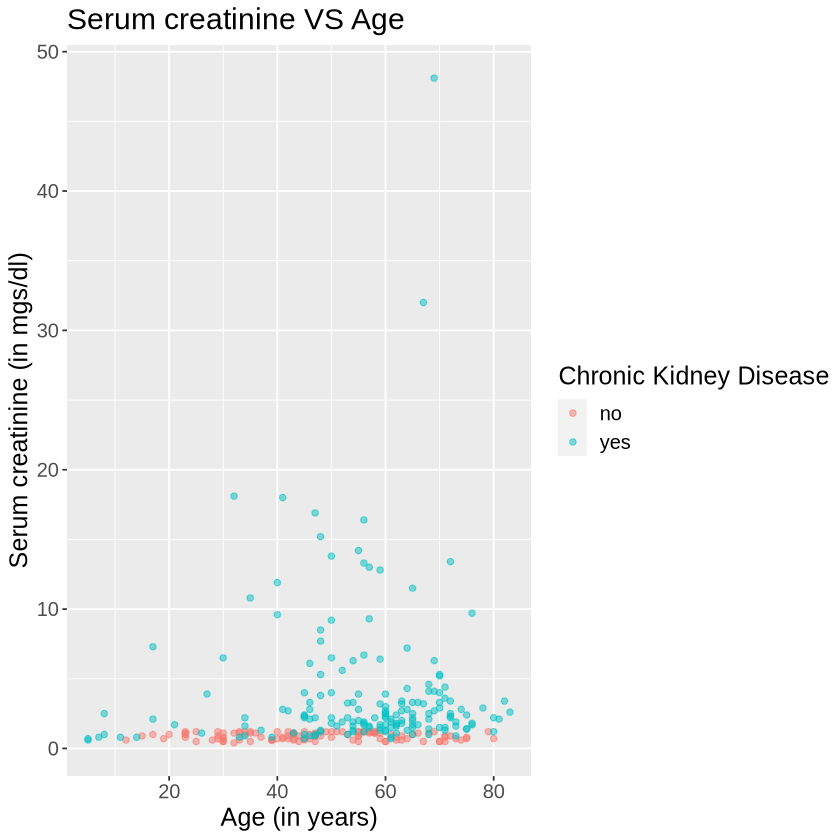

Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


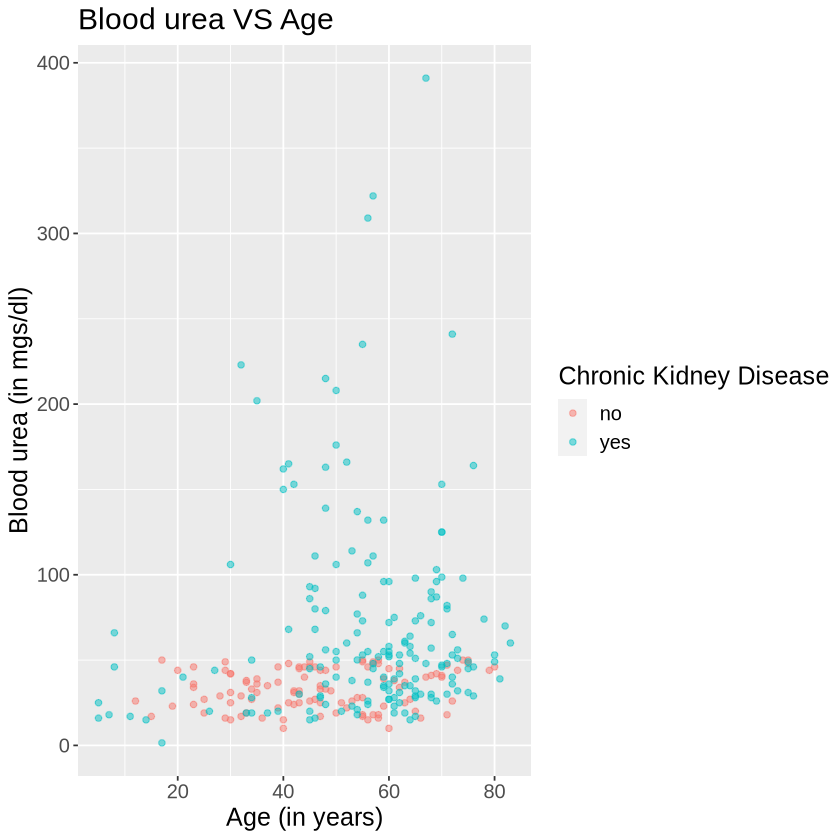

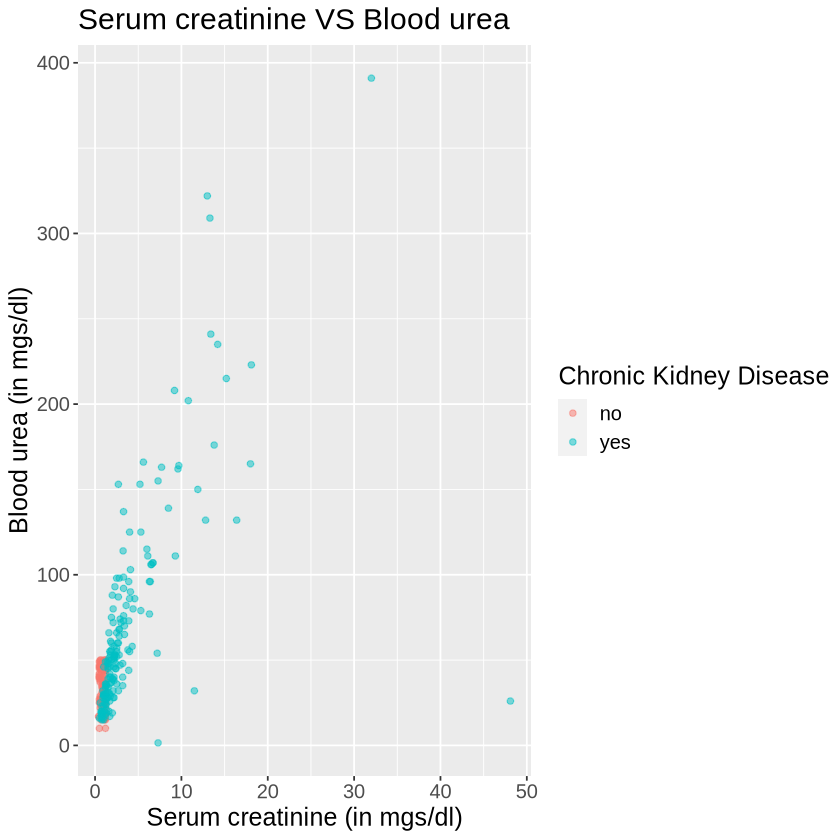

In [119]:
#plotting training data 
plot4 <- ggplot(ckd_plot, aes(x = age, y = serum_creatinine, color = ckd)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (in years)", y = "Serum creatinine (in mgs/dl)", color = "Chronic Kidney Disease") +
    ggtitle("Serum creatinine VS Age") +
    theme(text=element_text(size=15))
plot5 <- ggplot(ckd_plot, aes(x = age, y = blood_urea, color = ckd)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (in years)", y = "Blood urea (in mgs/dl)", color = "Chronic Kidney Disease") +
    ggtitle("Blood urea VS Age") +
    theme(text=element_text(size=15))
plot6 <- ggplot(ckd_plot, aes(x = serum_creatinine, y = blood_urea, color = ckd)) +
    geom_point(alpha = 0.5) +
    labs(x = "Serum creatinine (in mgs/dl)", y = "Blood urea (in mgs/dl)", color = "Chronic Kidney Disease") +
    ggtitle("Serum creatinine VS Blood urea") +
    theme(text=element_text(size=15))

plot4
plot5
plot6